In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
img = cv2.imread('E:\CV\lena.jpg')
cv2.imshow("img", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
# Function Svertka (1 filter)
def Svertka(img, filter):
    S = np.zeros((img.shape[0]-2,img.shape[1]-2))
    for i in range(img.shape[0]-2):
        for j in range(img.shape[1]-2):
            S[i][j] = np.sum(img[i:i+3, j:j+3, :] * filter)            
    return S

In [19]:
# Filters
ker1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]]) 
ker2 =  np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]) 
ker3 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])

Filter1=np.array([ker1, ker2, ker3])/13
Filter2=np.array([ker2, ker3, ker1])/13
Filter3=np.array([ker3, ker1, ker2])/13
Filter4=np.array([ker1, ker3, ker2])/13
Filter5=np.array([ker3, ker2, ker1])/13

Filter=np.array([Filter1, Filter2, Filter3, Filter4, Filter5])

In [20]:
# 5 filters
S_img = np.zeros((img.shape[0]-2, img.shape[1]-2, 5))
for i in range(5):
    S_img[:, :, i] = Svertka(img, Filter[i])
    

In [21]:
# Check
print(img.shape)
print(S_img.shape)

(807, 807, 3)
(805, 805, 5)


In [22]:
# ReLU
def ReLU(image):
    relu_image = np.where(image > 0, image, 0)
    return relu_image

In [23]:
R_img = ReLU(S_img)

In [24]:
# MaxPooling
def MaxPooling(img):
    MP = np.zeros((img.shape[0] // 2, img.shape[1] // 2, 5))
    for k in range(5):
        for i in range(0, img.shape[0] - 1, 2):
            for j in range(0, img.shape[1] - 1, 2): 
                MP[i//2, j//2, k] = np.amax(img[i:i+2, j:j+2, k])
    return MP 

In [25]:
MP_img = MaxPooling(R_img)

In [26]:
# Check
print(MP_img.shape)

(402, 402, 5)


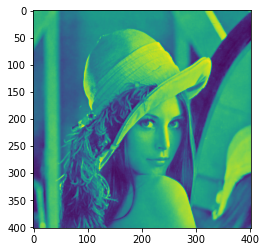

In [27]:
plt.imshow(MP_img[:,:, 0])

In [28]:
MP_img2 = MaxPooling(MP_img)

In [29]:
print(MP_img2.shape)

(201, 201, 5)


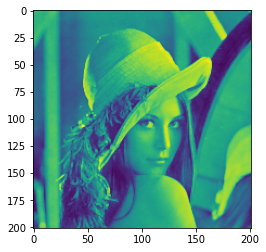

In [30]:
plt.imshow(MP_img2[:,:, 0])

In [31]:
MP_img3 = MaxPooling(MP_img2)
print(MP_img3.shape)

(100, 100, 5)


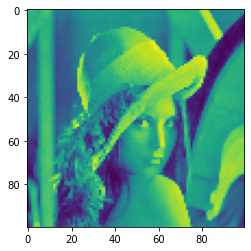

In [32]:
plt.imshow(MP_img3[:,:, 0])